<div align="center"> 
    <hr>
  <font size="6"><b>Dev | Clean-Clean Entity Resolution Notebook</b> </font>
   <hr>
</div>

In [1]:
!python --version

Python 3.9.1


In [3]:
import os
import sys
import pandas as pd
import networkx
from networkx import draw, Graph
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from pyjedai.utils import (
    text_cleaning_method,
    print_clusters,
    print_blocks,
    print_candidate_pairs
)
from pyjedai.evaluation import Evaluation, write
from pyjedai.datamodel import Data
d1 = pd.read_csv("./data/ccer/D2/abt.csv", sep='|', engine='python')
d2 = pd.read_csv("./data/ccer/D2/buy.csv", sep='|', engine='python')
gt = pd.read_csv("./data/ccer/D2/gt.csv", sep='|', engine='python')

data = Data(
    dataset_1=d1,
    attributes_1=['id','name','description'],
    id_column_name_1='id',
    dataset_2=d2,
    attributes_2=['id','name','description'],
    id_column_name_2='id',
    ground_truth=gt,
)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
data.dataset_2.iloc[216]

id                                      216
name           LG Navy Blue SteamWasher 27'
description                                
price                                      
Name: 216, dtype: object

In [3]:
data.print_specs()

------------------------- Data -------------------------
Type of Entity Resolution:  Clean-Clean
Dataset-1:
	Number of entities:  1076
	Number of NaN values:  0
	Attributes: 
		 ['id', 'name', 'description']
Dataset-2:
	Number of entities:  1076
	Number of NaN values:  0
	Attributes: 
		 ['name', 'description', 'price']

Total number of entities:  2152
Number of matching pairs in ground-truth:  1076
-------------------------------------------------------- 



In [7]:
data.dataset_1

,id,name,description,price
0,0,Sony Turntable - PSLX350H,Sony Turntable - PSLX350H/ Belt Drive System/ ...,
1,1,Bose Acoustimass 5 Series III Speaker System -...,Bose Acoustimass 5 Series III Speaker System -...,399.0
2,2,Sony Switcher - SBV40S,Sony Switcher - SBV40S/ Eliminates Disconnecti...,49.0
3,3,Sony 5 Disc CD Player - CDPCE375,Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...,
4,4,Bose 27028 161 Bookshelf Pair Speakers In Whit...,Bose 161 Bookshelf Speakers In White - 161WH/ ...,158.0
...,...,...,...,...
1071,1071,Logitech Cordless Desktop Wave Keyboard And Mo...,Logitech Cordless Desktop Wave Keyboard And Mo...,79.0
1072,1072,Mitsubishi DLP Black TV Stand - MBS73V,Mitsubishi DLP Black TV Stand - MBS73V/ Matchi...,549.0
1073,1073,Logitech Digital Precision PC Gaming Headset -...,Logitech Digital Precision PC Gaming Headset -...,49.0
1074,1074,Logitech 2.1 Multimedia Silver Speaker System ...,Logitech 2.1 Multimedia Silver Speaker System ...,


# Block Building

In [4]:
from pyjedai.block_building import (
    StandardBlocking,
    QGramsBlocking,
    ExtendedQGramsBlocking,
    SuffixArraysBlocking,
    ExtendedSuffixArraysBlocking,
)

In [5]:
qgb = QGramsBlocking(qgrams=6)
blocks = qgb.build_blocks(data, attributes_1=['name'], attributes_2=['name'])

Q-Grams Blocking:   0%|          | 0/2152 [00:00<?, ?it/s]

In [6]:
qgb.evaluate(blocks, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Q-Grams Blocking
***************************************************************************************************************************
Method name: Q-Grams Blocking
Parameters: 
	Q-Gramms: 6
Runtime: 0.3321 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.32% 
	Recall:        99.91%
	F1-score:       0.63%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1075
	False positives: 337743
	True negatives: 820032
	False negatives: 1
	Total comparisons: 338818
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 0.3172794833804579,
 'Recall %': 99.90706319702602,
 'F1 %': 0.6325501479873138,
 'True Positives': 1075,
 'False Positives': 337743,
 'True Negatives': 820032,
 'False Negatives': 1}

# Block Cleaning

In [7]:
from pyjedai.block_cleaning import BlockFiltering

In [8]:
bf = BlockFiltering(ratio=0.8)
filtered_blocks = bf.process(blocks, data, tqdm_disable=False)

Block Filtering:   0%|          | 0/3 [00:00<?, ?it/s]

# Comparison Cleaning


In [9]:
from pyjedai.block_cleaning import BlockPurging

In [10]:
cbbp = BlockPurging()
cleaned_blocks = cbbp.process(filtered_blocks, data, tqdm_disable=False)

Block Purging:   0%|          | 0/4934 [00:00<?, ?it/s]

In [11]:
cbbp.evaluate(cleaned_blocks, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Block Purging
***************************************************************************************************************************
Method name: Block Purging
Parameters: 
	Smoothing factor: 1.025
	Max Comparisons per Block: 3780.0
Runtime: 0.0763 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      0.83% 
	Recall:        99.16%
	F1-score:       1.65%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1067
	False positives: 127190
	True negatives: 1030577
	False negatives: 9
	Total comparisons: 128257
───────────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 0.8319234037908262,
 'Recall %': 99.1635687732342,
 'F1 %': 1.6500042525882799,
 'True Positives': 1067,
 'False Positives': 127190,
 'True Negatives': 1030577,
 'False Negatives': 9}

## Meta Blocking

In [12]:
from pyjedai.comparison_cleaning import (
    WeightedEdgePruning,
    WeightedNodePruning,
    CardinalityEdgePruning,
    CardinalityNodePruning,
    BLAST,
    ReciprocalCardinalityNodePruning,
    ReciprocalWeightedNodePruning,
    ComparisonPropagation
)

In [13]:
wep = CardinalityEdgePruning(weighting_scheme='X2')
candidate_pairs_blocks = wep.process(filtered_blocks, data)

Cardinality Edge Pruning:   0%|          | 0/1076 [00:00<?, ?it/s]

In [14]:
wep.evaluate(candidate_pairs_blocks, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Cardinality Edge Pruning
***************************************************************************************************************************
Method name: Cardinality Edge Pruning
Parameters: 
	Node centric: False
	Weighting scheme: X2
Runtime: 8.6134 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      9.81% 
	Recall:        93.03%
	F1-score:      17.75%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 1001
	False positives: 9202
	True negatives: 1148499
	False negatives: 75
	Total comparisons: 10203
────────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 9.810839949034596,
 'Recall %': 93.02973977695167,
 'F1 %': 17.749800514229985,
 'True Positives': 1001,
 'False Positives': 9202,
 'True Negatives': 1148499,
 'False Negatives': 75}

# Entity Matching

It compares pairs of entity profiles, associating every pair with a similarity in [0,1]. Its output comprises the similarity graph, i.e., an undirected, weighted graph where the nodes correspond to entities and the edges connect pairs of compared entities.

In [15]:
from pyjedai.matching import EntityMatching

In [56]:
EM = EntityMatching(
    metric='dice',
    similarity_threshold=0.4
)

pairs_graph = EM.predict(candidate_pairs_blocks, data, tqdm_disable=True)

In [21]:
data.entities

,id,name,description,price
0,0,Sony Turntable - PSLX350H,Sony Turntable - PSLX350H/ Belt Drive System/ ...,
1,1,Bose Acoustimass 5 Series III Speaker System -...,Bose Acoustimass 5 Series III Speaker System -...,399.0
2,2,Sony Switcher - SBV40S,Sony Switcher - SBV40S/ Eliminates Disconnecti...,49.0
3,3,Sony 5 Disc CD Player - CDPCE375,Sony 5 Disc CD Player- CDPCE375/ 5 Disc Change...,
4,4,Bose 27028 161 Bookshelf Pair Speakers In Whit...,Bose 161 Bookshelf Speakers In White - 161WH/ ...,158.0
...,...,...,...,...
2147,1071,Sony VAIO FW378J/B Notebook - VGNFW378J/B,Intel Centrino 2 Core 2 Duo P8600 2.4GHz - 16....,
2148,1072,Sennheiser CX380 Sennheiser CX 380 Sport II Gr...,,
2149,1073,IWORK 09 RETAIL-INT DVD - MB942Z/A,,
2150,1074,IWORK 09 FAMILY PACK-INT DVD - MB943Z/A,,


In [68]:
EM = EntityMatching(metric='tf-idf', tokenizer = 'word_qgram_tokenizer', qgram=1, attributes=['name'], similarity_threshold=0.0)

pairs_graph = EM.predict(candidate_pairs_blocks, data)

Entity Matching (tf-idf):   0%|          | 0/1072 [00:00<?, ?it/s]

In [59]:
EM.tfidf_df

AttributeError: 'EntityMatching' object has no attribute 'tfidf_df'

In [60]:
EM.corpus[206]

'lg tromm wm2688hnm 4.2 cu. ft. navy blue front load allergiene steamwasher - wm2688hnbl'

In [61]:
EM.corpus[data.dataset_limit+216]

"lg navy blue steamwasher 27'"

In [26]:
data.dataset_2.iloc[216]

id                                      216
name           LG Navy Blue SteamWasher 27'
description                                
price                                      
Name: 216, dtype: object

In [41]:
# EM.tfidf_matrix

from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between all pairs of strings in the list
similarity_matrix = cosine_similarity(EM.tfidf_matrix)


In [67]:
EM._entities_d1

['sony turntable - pslx350h',
 'bose acoustimass 5 series iii speaker system - am53bk',
 'sony switcher - sbv40s',
 'sony 5 disc cd player - cdpce375',
 'bose 27028 161 bookshelf pair speakers in white - 161wh',
 'denon stereo tuner - tu1500rd',
 'kitchenaid pasta roller and cutter - kpra',
 'panasonic yeast pro automatic breadmaker - sdyd250',
 'sony vertical-in-the-ear stereo headphones - mdrj10',
 'panasonic 2-line integrated telephone - kxtsc14w',
 'panasonic integrated telephone system - kxts108w',
 'panasonic 2-line integrated telephone system - kxts208w',
 'sony 300 disc cd changer - cdpcx355',
 'sony 400 disc megastorage cd changer - cdpcx455',
 'panasonic hands-free headset - kxtca86',
 'panasonic hands free headset  - kxtca92',
 'cuisinart convection-oven-toaster-broiler with exact heat sensor - tob165wh',
 "frigidaire 24' white built-in dishwasher - fdb130wh",
 'cuisinart cordless electric kettle - kua17',
 'omnimount wall speaker mount - 20wlbk',
 'omnimount wall speaker mo

In [62]:
EM.tfidf_similarity_matrix

array([[1.        , 0.00158171, 0.04005327, ..., 0.00171622, 0.00158923,
        0.00147107],
       [0.00158171, 1.        , 0.00619731, ..., 0.00119504, 0.00110661,
        0.02257776],
       [0.04005327, 0.00619731, 1.        , ..., 0.0019111 , 0.00176968,
        0.00576379],
       ...,
       [0.00171622, 0.00119504, 0.0019111 , ..., 1.        , 0.50341936,
        0.00111144],
       [0.00158923, 0.00110661, 0.00176968, ..., 0.50341936, 1.        ,
        0.00519086],
       [0.00147107, 0.02257776, 0.00576379, ..., 0.00111144, 0.00519086,
        1.        ]])

In [63]:
similarity_matrix[206][data.dataset_limit+216]
# similarity_matrix[206][data.dataset_limit+216]

0.12950955755331722

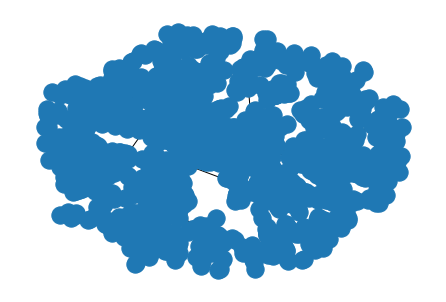

In [46]:
draw(pairs_graph)

In [69]:
EM.evaluate(pairs_graph)

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Tokenizer: word_qgram_tokenizer
	Metric: tf-idf
	Similarity Threshold: 0.0
Runtime: 0.1615 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      9.83% 
	Recall:        92.84%
	F1-score:      17.78%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 9.828807556080283,
 'Recall %': 92.84386617100373,
 'F1 %': 17.775800711743774,
 'True Positives': 999,
 'False Positives': 9165,
 'True Negatives': 1148534,
 'False Negatives': 77}

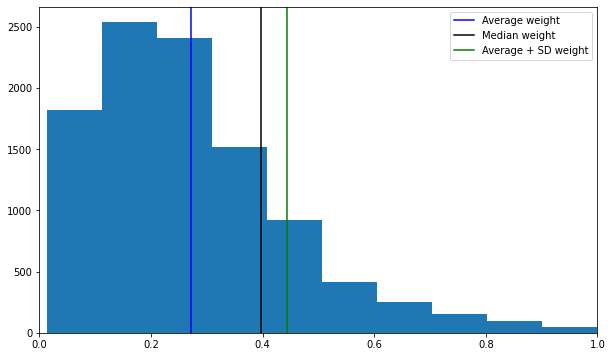

In [70]:
EM.plot_distribution_of_all_weights()

Distribution-% of predicted scores:  [15.082644628099173, 25.403384494293586, 24.183392365210548, 15.791027154663517, 9.700905155450611, 4.319165682802047, 2.577725304998032, 1.5545060999606455, 0.954348681621409, 0.30499803227075956]


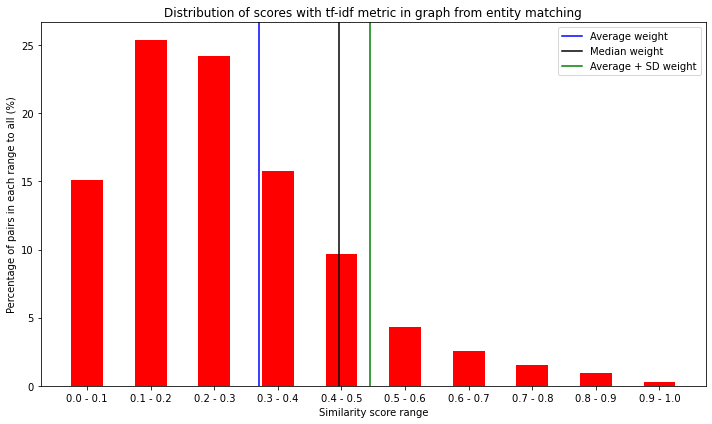

In [71]:
EM.plot_distribution_of_scores()

In [57]:
EM.evaluate(pairs_graph)

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Tokenizer: char_qgram_tokenizer
	Metric: tf-idf
	Similarity Threshold: 0.0
Runtime: 0.5540 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:      9.81% 
	Recall:        93.03%
	F1-score:      17.75%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 9.810839949034596,
 'Recall %': 93.02973977695167,
 'F1 %': 17.749800514229985,
 'True Positives': 1001,
 'False Positives': 9202,
 'True Negatives': 1148499,
 'False Negatives': 75}

In [59]:
# Fill NaN values with empty string
data.dataset_1 = data.dataset_1.fillna("", inplace=True)
if not data.is_dirty_er:
    data.dataset_2 = data.dataset_2.fillna("", inplace=True)

AttributeError: 'NoneType' object has no attribute 'fillna'

In [ ]:
EM.evaluate(pairs_graph)

***************************************************************************************************************************
                                         Μethod:  Entity Matching
***************************************************************************************************************************
Method name: Entity Matching
Parameters: 
	Tokenizer: white_space_tokenizer
	Metric: dice
	Similarity Threshold: 0.4
Runtime: 6.8665 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     71.43% 
	Recall:        12.55%
	F1-score:      21.34%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 71.42857142857143,
 'Recall %': 12.546468401486987,
 'F1 %': 21.34387351778656,
 'True Positives': 135,
 'False Positives': 54,
 'True Negatives': 1156781,
 'False Negatives': 941}

# Entity Clustering

It takes as input the similarity graph produced by Entity Matching and partitions it into a set of equivalence clusters, with every cluster corresponding to a distinct real-world object.

In [21]:
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering

In [22]:
ccc = ConnectedComponentsClustering()
clusters = ccc.process(pairs_graph, data)

In [23]:
ccc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Connected Components Clustering
***************************************************************************************************************************
Method name: Connected Components Clustering
Parameters: 
Runtime: 0.0070 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     97.24% 
	Recall:        16.36%
	F1-score:      28.00%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 176
	False positives: 5
	True negatives: 1156871
	False negatives: 900
	Total comparisons: 181
──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────

{'Precision %': 97.23756906077348,
 'Recall %': 16.356877323420075,
 'F1 %': 28.00318217979315,
 'True Positives': 176,
 'False Positives': 5,
 'True Negatives': 1156871,
 'False Negatives': 900}

In [23]:
from pyjedai.clustering import ConnectedComponentsClustering, UniqueMappingClustering
umc = UniqueMappingClustering()
clusters = umc.process(pairs_graph, data)

In [24]:
umc.evaluate(clusters, with_classification_report=True)

***************************************************************************************************************************
                                         Μethod:  Unique Mapping Clustering
***************************************************************************************************************************
Method name: Unique Mapping Clustering
Parameters: 
Runtime: 0.0196 seconds
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Performance:
	Precision:     82.17% 
	Recall:        17.57%
	F1-score:      28.94%
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
Classification report:
	True positives: 189
	False positives: 41
	True negatives: 1156848
	False negatives: 887
	Total comparisons: 230
───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────


{'Precision %': 82.17391304347827,
 'Recall %': 17.565055762081787,
 'F1 %': 28.94333843797856,
 'True Positives': 189,
 'False Positives': 41,
 'True Negatives': 1156848,
 'False Negatives': 887}